# Topics



## 1. Fourier Transform of 2D Images -- Slides
###      i) FT of 2D images.
###      ii) FT Video
###      iii) Why we need PCA -- the gateway to machine learning.


## How to sort frequencies and Fourier components

In [ ]:
%matplotlib inline


'''Breakout Solutions'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
import os


def get_tone(f, duration, sample_rate = 44100, amp = 2**14, play_sound = False):


    time_pts = np.linspace(0, duration, duration*sample_rate)
#     tone = np.int16(amp*np.sin(np.pi*2*f*time_pts))
    tone = amp*np.sin(np.pi*2*f*time_pts)
    if play_sound:
        playsound(tone)
    
    return tone


def plot_fourier(sample_rate, signal, freq_lim = 1000., plotting = False):
    '''
    Given sample_rate and signal, plots the real and imaginary parts of DFT.
    '''
    
    # note: This conversion to float64 is crucial -- or else the numerical error will be greater.
    #ft = np.fft.fft(np.float64(signal))
    ft = np.fft.fft(np.float64(signal))

    freq = np.fft.fftfreq(signal.shape[-1], d = 1./sample_rate)
    if plotting:
        plt.figure()
        plt.title('Real')
        plt.plot(freq, ft.real, 'b-')
        plt.xlim([420, 460])

    #    plt.xlim([-freq_lim, freq_lim])
        plt.figure()
        plt.title('Imaginary')
        plt.plot(freq, ft.imag, 'g-')
        plt.xlim([420, 460])

    #    plt.xlim([-freq_lim, freq_lim])
        plt.show()
    
    return ft, freq


def signal_rec(ft, filt = None):
    
    '''
    does inverse fft and returns the array of sound data.
    '''
        
    import copy
    ft_filt = copy.copy(ft)
    try:
        len(filt)
    except:
        pass
    else:
        ft_filt *= filt

    tone_data_rec = np.fft.ifft(ft_filt)

    Re_to_Im = np.abs(float(np.abs(tone_data_rec.imag).max())/np.abs(tone_data_rec.real).max())
    if Re_to_Im > 1e-14:
        print 'WARNING: max the imaginary part may be too large:', Re_to_Im
        plt.figure()
        plt.title('imag/real')
        plt.plot(tone_data_rec.imag/tone_data_rec.real, 'k--')
        plt.show()

    # Rejecting the imaginary part
    tone_data_rec = tone_data_rec.real

    return tone_data_rec

    
def plotsound(time_pts, sound, fig = None, t_lim = 0.02, s_lim = 'auto', plot_style = 'b-'):
    
    if fig == None:
        plt.figure()
    plt.title("Sound Wave vs. Time")
    plt.plot(time_pts, sound, plot_style)
    plt.xlim([0, t_lim])
    if s_lim  != 'auto':
        plt.ylim([-s_lim, s_lim])
        
    return 

def playsound(sndarr, sample_rate = 44100, vol = 0.1):
    from scipy.io.wavfile import write
    import os
    write('tmp.wav', sample_rate, np.int16(vol*sndarr))
    os.system("afplay tmp.wav") 
    os.system("rm tmp.wav") 
    return




f = 440.
sample_rate = 44100
duration = 2.
time_pts = np.linspace(0, duration, duration*sample_rate)


tone = get_tone(f, duration)

tone = np.int16(tone)
ft, freq = plot_fourier(sample_rate, tone)

#playsound(tone, vol = 0.5)

# BEFORE SORTING
plt.figure()
plt.title('frequency before sorting')
plt.plot(freq)

plt.figure()
plt.title('ft.real before sorting')
plt.plot(ft.real)


plt.figure()
plt.title('ft.real vs. freq before sorting')
plt.plot(freq, ft.real)
plt.xlim([420, 460])

# # How to sort frequencies and Fourier components together.
idx = np.argsort(freq)
freq = freq[idx]
ft = ft[idx]

# AFTER SORTING

plt.figure()
plt.title('frequency after sorting')
plt.plot(freq)

plt.figure()
plt.title('ft.real after sorting')
plt.plot(ft.real)


plt.figure()
plt.title('ft.real vs. freq after sorting')
plt.plot(freq, ft.real)
plt.xlim([420, 460])



## 2D Fourier Transform: numpy.fft.fft2()
### - In general: numpy.fft.fftn(), and you can specify the dimensionality.
### - For higher dimension FT, the advantage of FFT is more obvious
### - Therefore, take full advantage of it: Whenever possible use image dimensions that are powers of 2.  The FFT algorithm depends on the divisibility by 2.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('straight_stripes.gif')
im = im[:,:,0]
print type(im), im.shape, im.dtype


plt.figure(figsize = (8, 5))
plt.imshow(im, cmap = plt.cm.Greys_r )
plt.show()


## From the documentation of numpy.fft.fft2

### "Compute the 2-dimensional inverse discrete Fourier Transform.  This function computes the inverse of the 2-dimensional discrete Fourier Transform over any number of axes in an M-dimensional array by means of the Fast Fourier Transform (FFT). In other words, ifft2(fft2(a)) == a to within numerical accuracy. By default, the inverse transform is computed over the last two axes of the input array."


http://jiffyclub.github.io/numpy/reference/generated/numpy.fft.ifft2.html



I'm fairly sure that if one applies fft to a 2D image, it perform a 1D fft on the last axis.  That is if the image is 256x256, it performs 256 1D FT's.  That's why the result is two vertical lines.  This equivalent of saying the result of the 2-slid interference experiment is 
the familier interference stripes.  That is, the 2-slit experiement does 1D FT for each row.


In [ ]:
import numpy as np
ft2d = np.fft.fft2(im)

print type(ft2d), ft2d.shape, ft2d.dtype

ft2d_sq = np.abs(ft2d)**2
print type(ft2d_sq), ft2d_sq.shape, ft2d_sq.dtype

plt.figure()
plt.title("Before sorting")
plt.imshow(np.abs(ft2d),  cmap = plt.cm.gray)

print np.array([ft2d_sq[0, 0], ft2d_sq[0, -1], ft2d_sq[-1, 0], ft2d_sq[-1, -1]]).max()
print ft2d_sq[0, 0], ft2d_sq[0, -1], ft2d_sq[-1, 0], ft2d_sq[-1, -1]

print ft2d[0, 0]
print im.sum()


# Create k ("frequency") values
kx = np.fft.fftfreq(ft2d.shape[1])
ky = np.fft.fftfreq(ft2d.shape[0])

# Sort kx, ky and Fourier components
xidx = np.argsort(kx)
yidx = np.argsort(ky)

# Note how the sorting is done for 2D Fourier map
ft2d = ft2d[:, xidx]
ft2d = ft2d[yidx, :]

kx = kx[xidx]
ky = kx[yidx]

# print kx
# print ky

plt.figure()
plt.title("After sorting")
#plt.imshow(np.abs(ft2d), cmap = plt.cm.gray)
# To see better, use sqrt scale
plt.imshow(np.sqrt(np.abs(ft2d)), cmap = plt.cm.gray)

plt.colorbar()
plt.show()

## Breakout 1: write function FT2D(im) and it should returns (properly sorted) ft2d, kx, ky

In [ ]:
%matplotlib inline
'''
The main reason for additional (minor) components: a diagonal can only be approximated by the square pixels 
of the image, hence, additional frequencies are needed to compose the image.
0
'''


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('slant_stripes.gif')
im = im[:,:,0]
print type(im), im.shape, im.dtype


plt.figure(figsize = (8, 5))
plt.imshow(im, cmap = plt.cm.Greys_r )

ft2d, kx, ky = ft2d(im)
plt.figure()
#To see better, use sqrt scale
plt.imshow(np.sqrt(np.abs(ft2d)), cmap = plt.cm.gray)
plt.colorbar()

plt.show()



## Simple application: Remember we said for character recognition, it's not ideal to have the rotated version -- often for a text, we can figure out whether it's rotated or not.

In [ ]:
%matplotlib inline
'''
The main reason for additional (minor) components: a diagonal can only be approximated by the square pixels 
of the image, hence, additional frequencies are needed to compose the image.

'''


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('sonnet.gif')
im = im[:,:,0]
print type(im), im.shape, im.dtype


plt.figure(figsize = (8, 5))
plt.imshow(im, cmap = plt.cm.Greys_r )

ft2d, kx, ky = FT2D(im)
plt.figure()
#To see better, use sqrt scale
plt.imshow(np.log(np.abs(ft2d)), cmap = plt.cm.gray)
plt.colorbar()

plt.figure()
plt.plot(kx)

plt.show()


In [ ]:
%matplotlib inline
'''
The main reason for additional (minor) components: a diagonal can only be approximated by the square pixels 
of the image, hence, additional frequencies are needed to compose the image.

'''


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im_slant = mpimg.imread('slant_sonnet.gif')
#im = im[:,:,0]
print type(im_slant), im_slant.shape, im_slant.dtype


plt.figure(figsize = (8, 5))
plt.imshow(im, cmap = plt.cm.Greys_r )

ft2d_slant, kx, ky = FT2D(im_slant)
plt.figure()
#To see better, use sqrt scale
plt.imshow(np.log(np.abs(ft2d_slant)), cmap = plt.cm.gray)
plt.colorbar()

plt.show()



## Breakout 2:

### - Generate a image that has a circular shape in the middle that has values 1, and everywhere else the value should be zero.
### - Image size: 256x256
### - circle size: r = 8

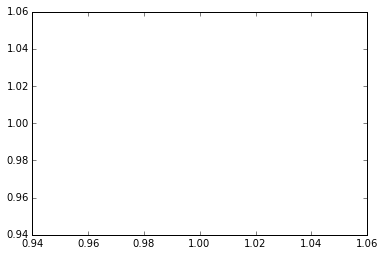

In [36]:
arraydude = np.zeros((256,256))
x = arraydude[0]
y = arraydude[1]
for dudes in np.arange(0,len(arraydude[0])):
    for dudettes in np.arange(0, len(arraydude[1])):
        if x[dudes]**2 + y[dudettes]**2 < .5:
            x[dudes] = 1
            y[dudettes] = 1
            
plt.figure()
plt.plot(x,y)
plt.show()
    


In [ ]:
ft2d, kx, ky = FT2D(cir_im)
plt.figure()
#To see better, use sqrt scale
plt.imshow(np.sqrt(np.abs(ft2d)), cmap = plt.cm.gray)
plt.colorbar()


plt.show()

## Breakout 3: 
### For the image of vertical stripes,

### - Part a): Suppose we used np.fft.fft(), what would we get?

### - Part b): find the cross section through the middle of the Fourier map.

## Physics Question: What's the physical interpretation of this?

## Just how many Fourier components do we need to adequately reconstruct an image?

In [ ]:
'''

Turn off sound -- it's a giveaway.

See who guesses it first...

'''

from IPython.display import YouTubeVideo
YouTubeVideo('D9ziTuJ3OCw')


# What is a computational physicist to do??
# Principal Component Analysis!!


## Breakout 4: At the end of the cell below, you are given an image N.  Plot it and then find its power spectrum and plot it.

In [ ]:
%matplotlib inline

'''

Breakout:
Give students the dust map, and ask them to figure out the power spectrum

'''


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def dust_map(Ndim, k, A, phz, imax, jmax, Nfac = 1.):
    
    '''
        Produces dust density map 
    '''
        
    
    
    ### Setting up the phases for the Fourier components.
    
    # Left half (0<j<jmax/2)
    phz[1:, 1:jmax/2] = np.random.rand(phz[1:, 1:jmax/2].shape[0], phz[1:, 1:jmax/2].shape[1])
    #phz[1:, imax/2+1:] = -phz[1:, imax/2+1:][::-1, ::-1]
    
    # The column of jmax/2:
    phz[1:imax/2, jmax/2] = np.random.rand(phz[1:imax/2, jmax/2].size)
    phz[imax/2+1:, jmax/2] = -phz[1:imax/2, jmax/2][::-1]
    
    # The 0th column
    phz[1:imax/2, 0] = np.random.rand(phz[1:imax/2, 0].size)
    phz[imax/2+1:, 0] = -phz[1:imax/2, 0][::-1]
    
    # Left half of the 0th row
    phz[0, 1:jmax/2] = np.random.rand(phz[0, 1:jmax/2].size)
    
    # (imax/2+1)th element in 0th column; (jmax/2+1)th element in 0th row; the Nyquist element.
    phz[imax/2, 0] = np.random.randint(2)/2.
    phz[0, jmax/2] = np.random.randint(2)/2.
    phz[imax/2, jmax/2] = np.random.randint(2)/2.
    
    
    # (Half of the) Fourier components for a real field.
    rFS = A*np.exp(phz*1j*2*np.pi)
    
    
    ### Generating the density field.
    N = np.fft.irfftn(rFS)
       
    return N

Ndim = 128
kmin = 0.
kstart = 1.
kend = Ndim
kpts = Ndim

k_neg = -np.linspace(kend, kstart, kpts)
k_pos = -k_neg[1:][::-1]
kx = np.concatenate([np.array([0]), k_pos, k_neg])
ky = np.concatenate([np.array([0]), k_pos, k_neg[0].reshape((1,))])

kyy, kxx = np.meshgrid(ky, kx)
k = np.sqrt(kxx**2 + kyy**2)
### For this step see the comment above the def of kmin.
k = np.sqrt(k**2 + kmin**2)

imax = kx.size
jmax = (ky.size-1)*2  # I'm defining jmax this way to remind myself I'm only generating half of the Fourier field.

phz = np.zeros(k.shape)


half_gamma = -2.75/2


A = np.ones(k.shape)*1e-16
A = np.zeros(k.shape)
# To avoid the (0, 0) corner.
A[0, 1:] = k[0, 1:]**half_gamma#+0.002*np.random.randn(k[0, 1:].shape[0])
A[1:, :] = k[1:, :]**half_gamma#+0.002*np.random.randn(k[1:, :].shape[0], k[1:, :].shape[1])



N = dust_map(Ndim, k, A, phz, imax, jmax)


## End of Week 12, Lecture 2